In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn #for visualization

In [4]:
digits = load_digits()

In [5]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [6]:
digits.data[0] #array of the image plotted below, has 64 values

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

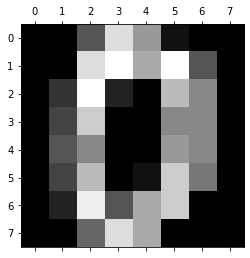

In [7]:
plt.gray()
plt.matshow(digits.images[0])

In [8]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(1437, 64)
(360, 64)
(360,)
(1437,)


In [21]:
len(X_train)

1437

In [22]:
len(X_test)

360

In [40]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)#for training, X_train has the images, y_train has the correspodning output 0, 9

/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(X_test, y_test)#how good the model is 

0.9694444444444444

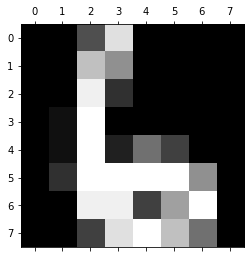

In [27]:
plt.matshow(digits.images[67])

In [28]:
digits.target[67]

6

In [29]:
model.predict([digits.data[67]]) #predicts target variable correctly

array([6])

In [30]:
model.predict(digits.data[0:5]) #still predicting well 

array([0, 1, 2, 3, 4])

In [34]:
#confusion matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 27,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 41]])

Text(69.0, 0.5, 'Truth')

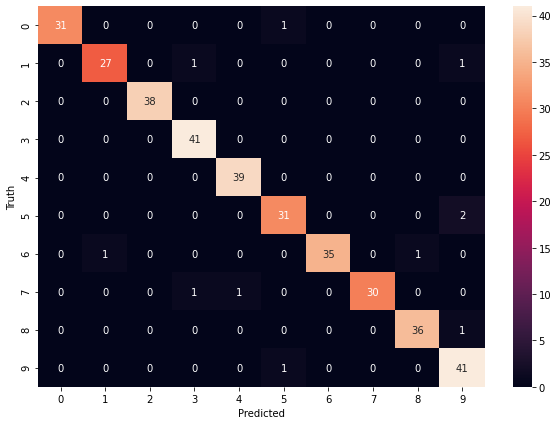

In [36]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
print(metrics.classification_report(y_test, y_predicted)) 
'''
precision: measure of classifier's exactness, for all instances classified positive, what % was correct 
recall: measure of classifier's completeness, for all instances theat were actually positive, what % was classified correctly 
f1-score: weighted mean of precisioon and recall 
support: number of actual occurences

'''

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.96      0.93      0.95        29
           2       1.00      1.00      1.00        38
           3       0.95      1.00      0.98        41
           4       0.97      1.00      0.99        39
           5       0.94      0.94      0.94        33
           6       1.00      0.95      0.97        37
           7       1.00      0.94      0.97        32
           8       0.97      0.97      0.97        37
           9       0.91      0.98      0.94        42

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

